<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DataAnalysis/blob/main/03.%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch03_03_%EA%B8%B0%EB%8C%80%EA%B0%92%EA%B3%BC_%EB%B6%84%EC%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.03. 기대값과 분산
---
* 날짜: 2022-05-06
* 이름: 박태현

## 학습내용
    - 기대값
    - 분산
    - 공분산
    - 상관계수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **| 기댓값**

\begin{align}
\mu_X = \text{E}[X] = \sum_{x_i \in \Omega} x_ip(x_i) 
\end{align}


In [10]:
def E(X, P = []) : # X , P는 numpy 배열

  if not len(P) :
    P = np.array([1/len(X)] * len(X))

  return np.sum(X * P)

In [118]:
X = np.array([1,2])
P = np.array([0.5,0.5])

E(X), E(X,P)

(1.5, 1.5)

#### **예제 01. 공정한 주사위**



In [119]:
X = np.arange(1,7)
E(X)

3.5

#### **예제 02. 공정하지 않은 주사위**

짝수가 나올 확률이 홀수가 나올 확률의 두배인 주사위의 기대값을 구하세요.

In [120]:
X = np.arange(1,7)
P = np.array([1/9,2/9,1/9,2/9,1/9,2/9])

E(X,P)

3.666666666666666

#### **예제 03. 기대값의 성질**

X, Y, c 가 아래와 같이 주어졌을 때,
```
X = np.array([1,2,3,4])
Y = np.array([10,20,30,40])
c = np.array([4])
```

다음을 구하세요
```
E(X)
E(Y)
E(c)
E(X+Y)
E(X)+E(Y)
E(4X+3)
4E(X)+3
```

In [30]:
X = np.array([1,2,3,4])
Y = np.array([10,20,30,40])
c = np.array([4])

print( E(X), E(Y), E(c), E(X+Y), E(X)+E(Y), E(4*X+3), 4*E(X)+3 )

2.5 25.0 4.0 27.5 27.5 13.0 13.0


#### **예제 04. 시험 성적**

학생 네명의 시험 성적이 다음과 같을 때 총합점수의 평균(국어+수학) 을 두가지 방법으로 구하세요.

```
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])
```

In [35]:
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])

a = X_국어
b = X_수학

print((a+b).mean(), E(a+b)) # 가중치가 없으므로 산술평균을 사용해도 된다.

130.0 130.0


### **| 분산**

\begin{align}
V(X) = E[(X-E[X])^2]
\end{align}


In [22]:
def V(X, P = []):
  if not len(P) :
    P = np.array([1/len(X)] * len(X))
  return E( (X - E(X,P)) ** 2 )

In [23]:
X = np.array([1,2,3])
P = np.array([1/10, 1/10, 8/10])

print(E(X), V(X))
print(E(X,P), V(X,P))

2.0 0.6666666666666666
2.7 1.156666666666667


#### **예제 01. 동전 던지기**

두개의 동전을 던졌을 때 앞면이 나온 횟수를 확률 변수 X라 정의합니다.

다음을 구하세요.

```
X
P
E(X)
V(X)
```


In [24]:
X = np.array([0,1,2])
P = np.array([1/4,1/2,1/4])

print(E(X,P), V(X,P))

1.0 0.6666666666666666


#### **예제 02. 분산의 성질**


X,Y 가 아래와 같이 주어졌을 때

```
X = np.array([1,2,3,4,5,6,7,8,9])
c = np.array([10])
```

다음을 구하세요.

```
V(X)
V(c)
V(2X)
V(2X-2)
4 x V(X)
```

In [25]:
X = np.array([1,2,3,4,5,6,7,8,9])
c = np.array([10])

print( V(X), V(c), V(2*X), V(2*X-2), 4*V(X) )

6.666666666666666 0.0 26.666666666666664 26.666666666666664 26.666666666666664


#### **예제 03. 시험 성적**

학생 네명의 시험 성적이 다음과 같습니다.
```
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])
```

다음을 구하세요.
```
V(X_국어)
V(X_수학)
V(5*X_국어)
5*5*V(X_국어)
```


In [66]:
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])

print( V(X_국어), V(X_국어), V(5*X_국어), 5*5*V(X_국어) )

250.0 250.0 6250.0 6250.0


### **| 공분산**


\begin{align}
\text{Cov}(X, Y) = \text{E}[(X - \text{E}[X])(Y - \text{E}[Y])]
\tag{7.5.3}
\end{align}

In [124]:
def Cov (X,Y, PX = [], PY = []) :
  if not len(PX): PX = np.array([1/len(X)]*len(X))
  if not len(PY): PY = np.array([1/len(Y)]*len(Y)) 

  return E( (X - E(X, PX)) * (Y - E(Y, PY)) )

In [125]:
X = np.array([10,20,30,40])
Y = np.array([40,30,20,10])
Z = np.array([10,20,10,20])

Cov(X,Y), Cov(X,Z)

(-125.0, 25.0)

### **| 상관계수**


* 피어슨(Pearson) 상관계수

\begin{align}
\rho[X,Y] =  \dfrac{\text{Cov}[X, Y]}{\sqrt{\text{V}[X] \cdot \text{V}[Y]}}
\end{align}

\begin{align}
-1 \leq \rho \leq 1
\end{align}




In [126]:
def p(X,Y, PX = [], PY = []): 
  if not len(PX): PX = np.array([1/len(X)]*len(X))
  if not len(PY): PY = np.array([1/len(Y)]*len(Y)) 

  return Cov(X,Y, PX, PY) / np.sqrt( V(X,PX)* V(Y,PY) )

In [127]:
p(X,Y)

-1.0

#### **예제 01. 두 뽑기의 확률**

두 뽑기 A, B에서 나오는 숫자들의 확률이 아래와 같을 때 X와Y의 공분산과 상관계수를 구하세요.
```
X = [0,1,2]
P(X) = [1/5, 2/5, 2/5]
Y - [0, 1, 2]
P(Y) = [1/5, 3/5, 1/5]
```

In [128]:
X = np.array([0, 1, 2])
P_X = np.array([1/5, 2/5, 2/5])
Y = np.array([0, 1, 2])
P_Y = np.array([1/5, 3/5, 1/5])

print(Cov(X,Y, P_X, P_Y), p(X,Y, P_X, P_Y))

0.6666666666666666 0.9712858623572641


#### **예제 02. 표본 그리기 1**

아래 코드는 표본을 10000개 추출 합니다.



```
x, y = np.random.multivariate_normal([0, 0], [[1, a], [a, 1]], 10000).T
x.shape, y.shape
```

1. a 값이 `-1,0.7,0.3,0.01,-0.3,-0.7,-1` 일 때 x, y의 표본쌍 7개의 스캐터 플롯을 그리고, 
2. 각 경우에 x, y의 상관계수를 구하세요.


a = -1, p = -0.9999999999999999
a = 0.7, p = 0.7031326309744202
a = 0.3, p = 0.29409532667240473
a = 0.01, p = 0.007297032561315838
a = -0.3, p = -0.3037787696576054
a = -0.7, p = -0.7107646129187326
a = -1, p = -1.0


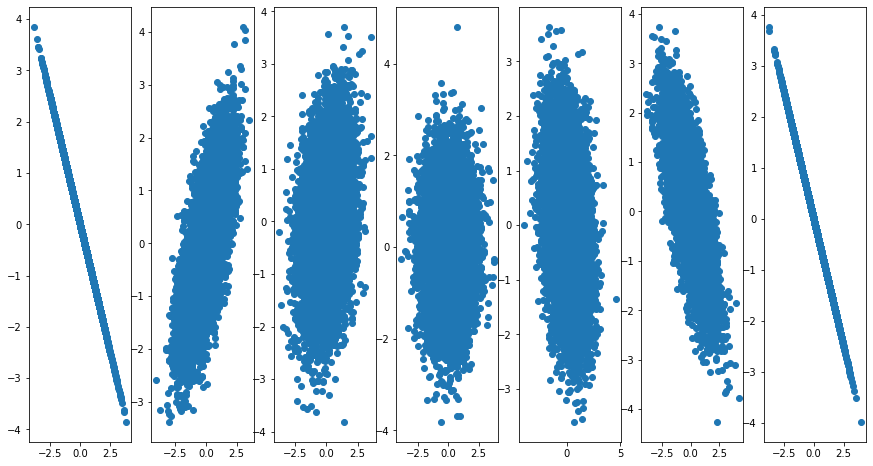

In [148]:
a = [-1, 0.7, 0.3, 0.01, -0.3, -0.7, -1]
plt.figure(figsize=(15,8))
for i, a in zip(range(len(a)), a):
  x, y = np.random.multivariate_normal([0, 0], [[1, a], [a, 1]], 10000).T
  x.shape, y.shape
  plt.subplot(1,7,i+1)
  plt.scatter(x,y)
  print(f'a = {a}, p = {p(x,y)}')

plt.show()

#### **예제 03. 표본 그리기 2**

아래 코드는 표본을 10000개 추출 합니다.



```
x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 10000).T
x.shape, y.shape
```


1. x 표본은 그대로 두고, y 표본에 `1, 0.7, 0.3, 0.01, -0.3, -0.7, -1`을 각각 곱해서 각 표본쌍의 스캐터 플롯 7개를 그리세요.
2. 7가지 경우에 대한 x, y 상관계수를 구하세요.


a = 1, p = 1.0000000000000002
a = 0.7, p = 1.0
a = 0.3, p = 1.0000000000000002
a = 0.01, p = 1.0
a = -0.3, p = 1.0
a = -0.7, p = 1.0000000000000002
a = -1, p = 1.0


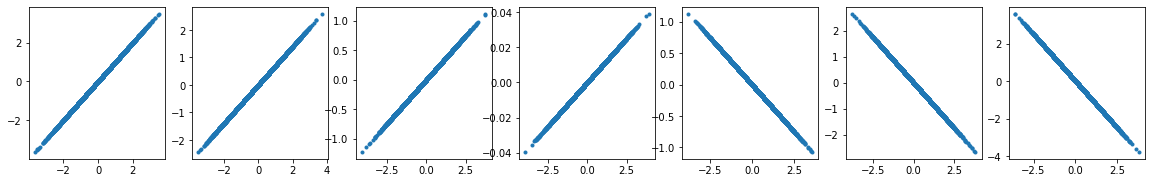

In [156]:
a = [1, 0.7, 0.3, 0.01, -0.3, -0.7, -1]
plt.figure(figsize=(20,2.8))
for i, a in zip(range(len(a)), a):
  x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 10000).T
  plt.subplot(1,7,i+1)
  plt.scatter(x,y*a, marker = '.')
  print(f'a = {a}, p = {p(x,y)}')

plt.show()